# CS 109A/AC 209A/STAT 121A Data Science: Homework 5
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
import sklearn.linear_model as sk
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Tarazi, Ramez

### Part (b): Course Number

CS 109a

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

In [2]:
#Load the data
data = np.loadtxt('datasets/dataset_1.txt', delimiter=',')

#Split into predictor and response
x = data[:, :-1]
y = data[:, -1]

#Print shapes of predictor and response arrays
print 'predictor matrix shape:', x.shape
print 'response array shape:', y.shape

predictor matrix shape: (543L, 64L)
response array shape: (543L,)


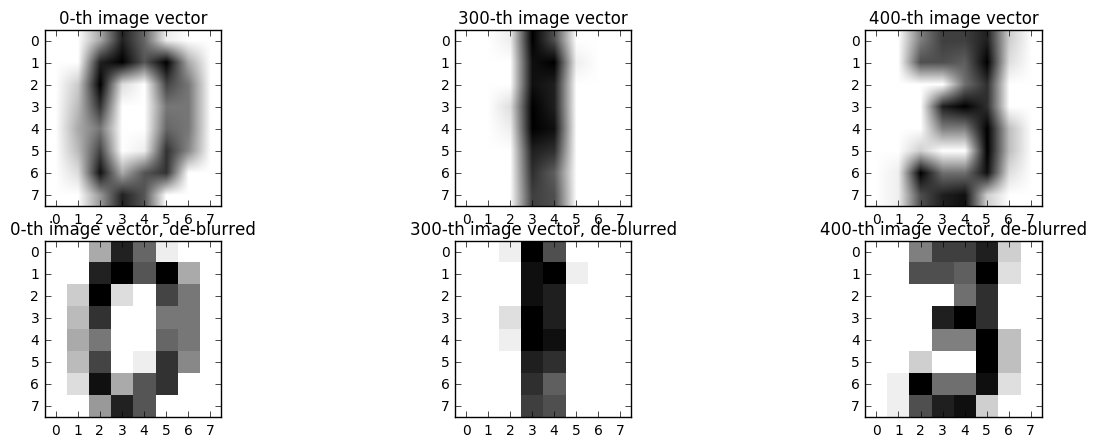

In [3]:
#Plot a couple of images from the dataset
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('0-th image vector')
ax[0, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('300-th image vector')
ax[0, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 2].set_title('400-th image vector')

ax[1, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('0-th image vector, de-blurred')
ax[1, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('300-th image vector, de-blurred')
ax[1, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 2].set_title('400-th image vector, de-blurred')

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

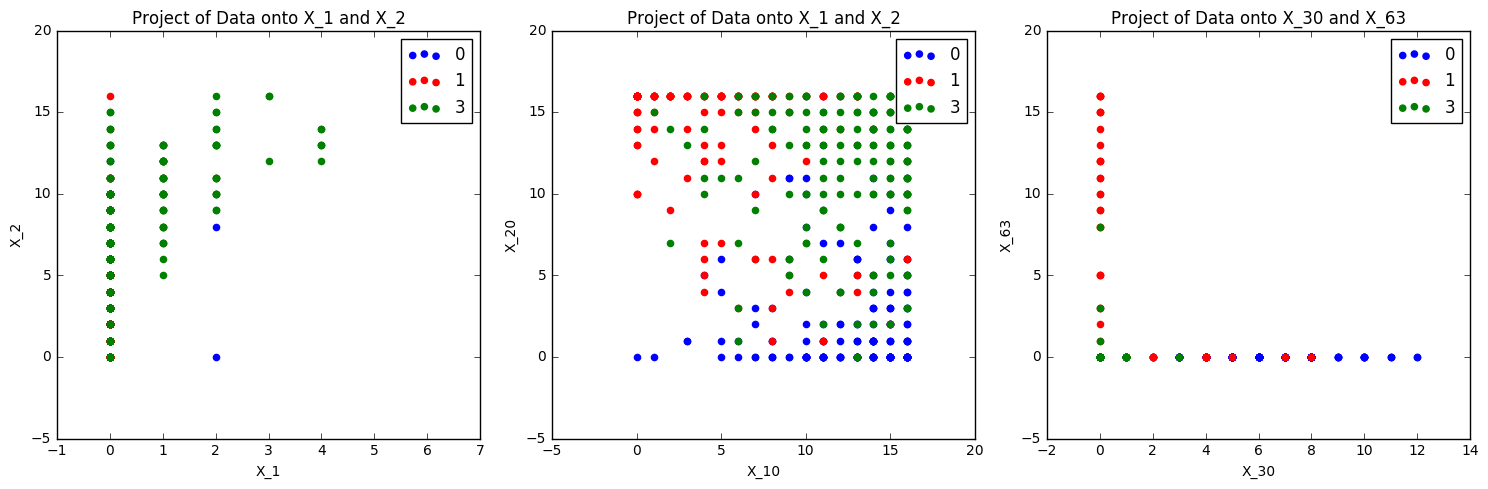

In [4]:
#Let's project the data onto some random 2D planes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Project onto axes: 1, 2
x_2d = x[:, [1, 2]]

ax[0].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[0].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[0].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[0].set_xlabel('X_1')
ax[0].set_ylabel('X_2')
ax[0].set_title('Project of Data onto X_1 and X_2')
ax[0].legend()

#Project onto axes: 10, 20
x_2d = x[:, [10, 20]]

ax[1].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[1].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[1].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')
 
ax[1].set_xlabel('X_10')
ax[1].set_ylabel('X_20')
ax[1].set_title('Project of Data onto X_1 and X_2')
ax[1].legend()


#Project onto axes: 30, 63
x_2d = x[:, [30, -1]]

ax[2].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[2].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[2].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[2].set_xlabel('X_30')
ax[2].set_ylabel('X_63')
ax[2].set_title('Project of Data onto X_30 and X_63')
ax[2].legend()

plt.tight_layout()
plt.show()

All these projections are really bad! In the sense that they don't seem capture the variation in the data **and** the classes are not separated when we project (no separation means no good decision surface, which means poor classification)!

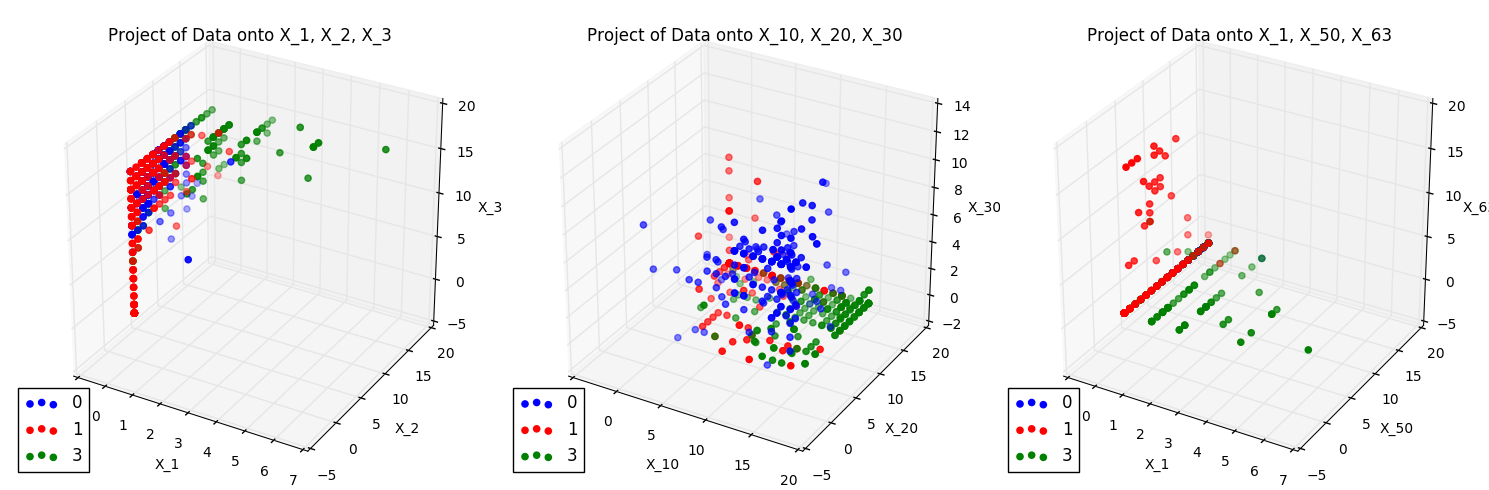

In [5]:
#Let's project the data onto some random 2D planes
fig = plt.figure(figsize=(15, 5))


#Project onto axes: 1, 2, 3
x_2d = x[:, [1, 2, 3]]

ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

ax1.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_zlabel('X_3')
ax1.set_title('Project of Data onto X_1, X_2, X_3')
ax1.legend(loc='lower left')

#Project onto axes: 10, 20, 30
x_2d = x[:, [10, 20, 30]]

ax2 = fig.add_subplot(1, 3, 2,  projection='3d')

ax2.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax2.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax2.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax2.set_xlabel('X_10')
ax2.set_ylabel('X_20')
ax2.set_zlabel('X_30')
ax2.set_title('Project of Data onto X_10, X_20, X_30')
ax2.legend(loc='lower left')

#Project onto axes: 1, 50, 63
x_2d = x[:, [1, 50, 63]]

ax3 = fig.add_subplot(1, 3, 3,  projection='3d')

ax3.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax3.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax3.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax3.set_xlabel('X_1')
ax3.set_ylabel('X_50')
ax3.set_zlabel('X_63')
ax3.set_title('Project of Data onto X_1, X_50, X_63')
ax3.legend(loc='lower left')

plt.tight_layout()
plt.show()

All these projections are really bad! In the sense that they don't seem capture the variation in the data **and** the classes are not well separated when we project (no separation means no good decision surface, which means poor classification)!

Let's try PCA. Recall that PCA finds the directions of maximum variation in the data! So let us see if projecting onto the axes of maximum variation yields more separability!

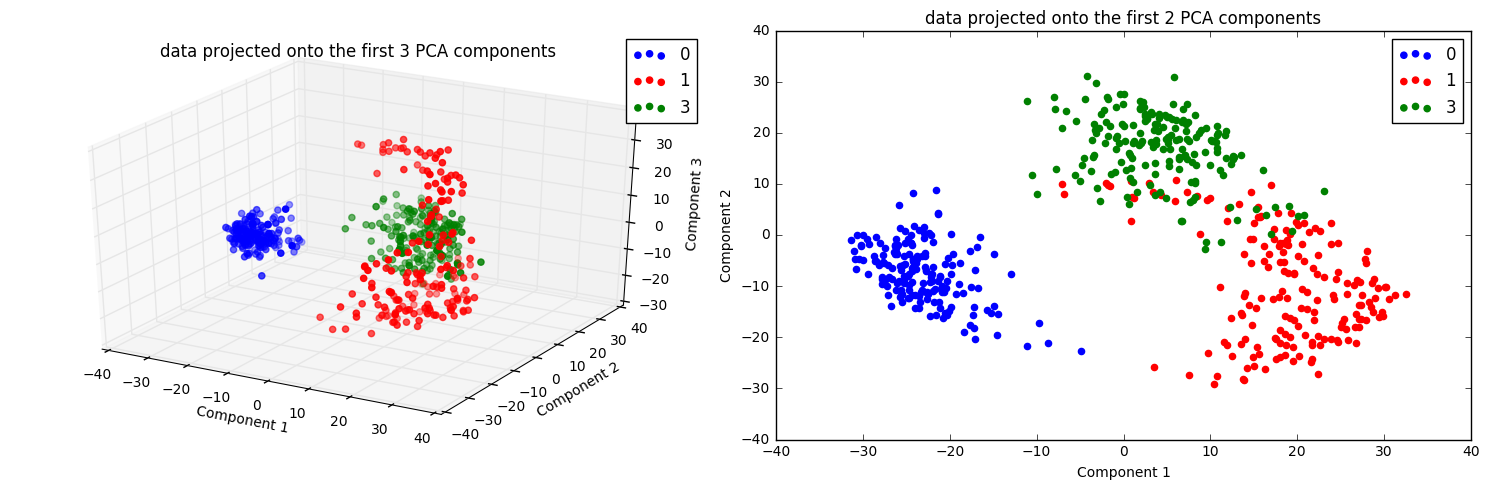

In [6]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], c='b', color='b', label='0')
ax2.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], c='r', color='r', label='1')
ax2.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], c='g', color='g', label='3')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 2 PCA components')
ax2.legend()

plt.tight_layout()
plt.show()

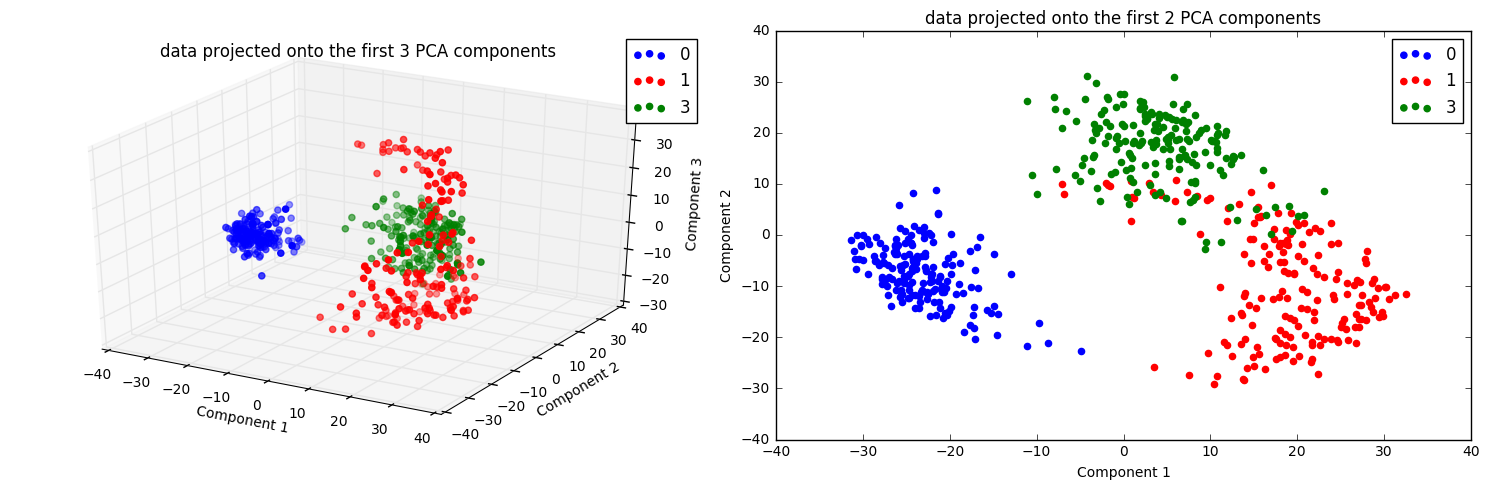

In [7]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], c='b', color='b', label='0')
ax2.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], c='r', color='r', label='1')
ax2.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], c='g', color='g', label='3')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 2 PCA components')
ax2.legend()

plt.tight_layout()
plt.show()

By contruction, the first 2 or 3 components of PCA captures the top 2 or 3 directions of maximum variation. Luckily in our case, the top 2 and 3 components also captures the **separation** in the classes! In fact, we realize that using 2 components of the PCA already separates all three classes! That means we can get away with using just two (linear combinations of) predictors!

**Question:** Does the directions of maximum variation always correspond to maximum separation of the classes? That is, is projecting our data onto the top components of the PCA always a good idea for classification?

**Question:** Recall that the components of PCA are **linear combos of our original predictors**. E.g. component 1 might be 
$$X_1 - 2 X_{10} + 10 X_{63}.$$
But in our case, our predictors are pixels, thus, each PCA component is a combination of different pixels - that is, each PCA component is a digital image! This is good news! It means that the components of the PCA are potentially interpretable.

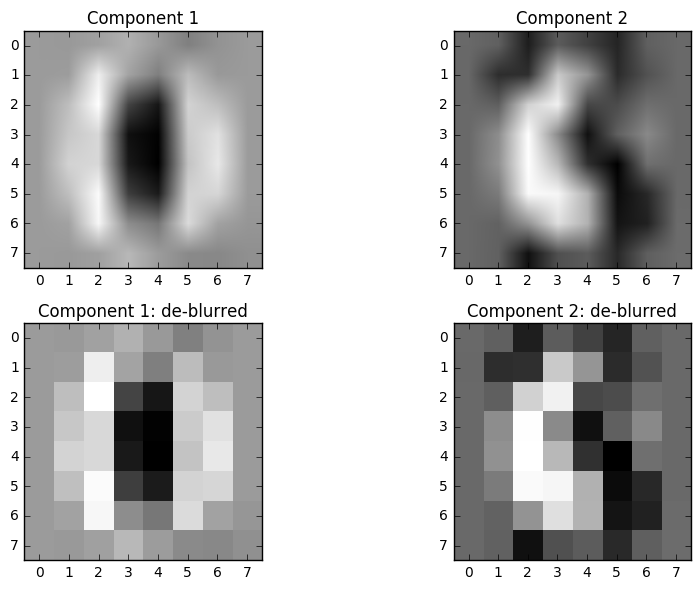

In [8]:
#Display the principal components of PCA as digital images
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
# COMPONENT 1
ax[0, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('Component 1')

# COMPONENT 2
ax[0, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('Component 2')

# COMPONENT 1
ax[1, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('Component 1: de-blurred')

# COMPONENT 2
ax[1, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('Component 2: de-blurred')

plt.tight_layout()
plt.show()

The first component looks like the digit 0 and the second resembles the digit 3! 

Look at our data projected onto the first two components: 

1. nearly all the data points corresponding to 0 are expressed as **a combination of a positive multiple of component 1 and a negative multiple of component 2**;

2. nearly all the data points corresponding to 3 are expressed as **a combination of a negative multiple of component 1 and a positive multiple of component 2**;

3. Nearly all the data points corresponding to the digit 1 is expressed as **a negative combination of the two components**.

**Sanity check:** does this intuitively make sense? 

### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

In [10]:
###Build a classifier to distinguish between 0 and 1

#Remove all instances of class 3
x_binary = x_reduced[y != 3, :]

#Remove all instances of class 3
y_binary = y[y != 3]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg()
logistic_01.fit(x_binary, y_binary)

###Build a classifier to distinguish between 1 and 3

#Remove all instances of class 0
x_binary = x_reduced[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 3
logistic_13 = LogReg()
logistic_13.fit(x_binary, y_binary)

###Build a classifier to distinguish between 0 and 3

#Remove all instances of class 1
x_binary = x_reduced[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 3
logistic_03 = LogReg()
logistic_03.fit(x_binary, y_binary)

#Predict a label for our dataset using each binary classifier
y_pred_01 = logistic_01.predict(x_reduced)
y_pred_13 = logistic_13.predict(x_reduced)
y_pred_03 = logistic_03.predict(x_reduced)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_03 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_13 == 1, 1] += 1

#Votes for 3
y_votes[y_pred_03 == 3, 2] += 1
y_votes[y_pred_13 == 3, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1)

#Relabel class 2 as class 3
y_pred[y_pred == 2] = 3

#Accuracy of our predictions
print 'Accuracy of combined model:', np.mean(y == y_pred)

Accuracy of combined model: 0.935543278085


### Part 1(c). Build a better one
Asses the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numberical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
  
  
     (**Multi-class Classification**)
     
     Logistic Regression requires well defined linearly seperable classes. Another issue with logistic regression is that each class has to be modelled and evaluated seperately. i.e Pr(Y = k | X) for each class (k being the class). Other issues include the amount of data (n) which needs to be large in comparison to the predictors. Smaller n's are more unstable with logistic regression.
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.


  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

    (**Better Model**)
    
    sklearns logistic regression module handles muliclass classification by a module call multinomial, which when set, uses the softmax function to predict the probability (or chance of occurance) to each possible class.
    I would suggest to use Linear Discriminant Analysis, due to the fact that logistic regression models parameters can be unstable, in which LDA is not effected by. Also when the number of datapoint on each class is low, and the distribution of the predictors is normal, LDA, again is more stable than logistic regression.
    
    




Is this accuracy meaningful? We've already seen cases where high R^2 values can be deeply misleading. Is an high accuracy rate mean we've learned a good classifier? Shouldn't there be a more intuitive way to assess the quality of our classifiers?

There many ways to verify the meaningfulness of our metrics (like R^2 and accuracy rate), in this case, since the reduced data is low dimensional, we can visually check the "goodness" of our classifier. I.e. we can plot our data and visualize the decision boundaries (the lines on which logistic regression rely to separate one class from another). Another method is to use the ROC(Receiver operating characteristics) Curves to assess the area under the graph of the True Positive Rate (recall) against the False Positive Rate.

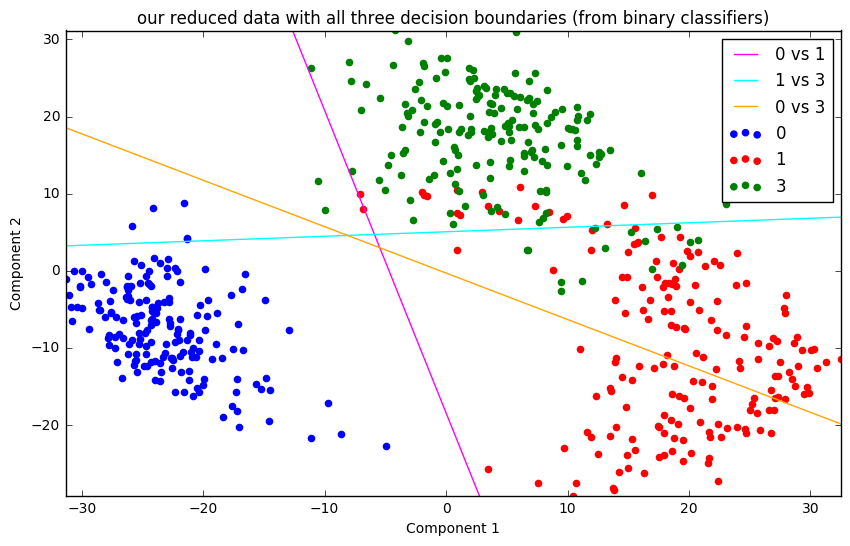

In [14]:
#--------  fit_and_plot_model
# A function to fit a binary LogReg model and visualize it
# Input: 
#      model (LogReg model)
#      ax (axes object for plotting)
#      legend_label (legend label for the plot)

def plot_model(model, ax, legend_label, color):
    #Get the coefficients from logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    
    #Find the max and min horizontal values of our data
    x_0 = np.min(x_reduced[:, 0])
    x_1 = np.max(x_reduced[:, 0])
        
    #Plug int the max and min horizontal values of our data into the equation
    #of the line defined by the coefficients
    y_0 = (-intercept - coef[0] * x_0) / coef[1]
    y_1 = (-intercept - coef[0] * x_1) / coef[1]

    #Plot a line through the pair of points we found above
    ax.plot([x_0, x_1], [y_0, y_1], label=legend_label, color=color)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

#Scatter plot of our data
ax.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], color='b', label='0')
ax.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], color='r', label='1')
ax.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], color='g', label='3')

#Plot decision boundaries for 0 vs 1
plot_model(logistic_01, ax, '0 vs 1', 'magenta')
#Plot decision boundaries for 1 vs 3
plot_model(logistic_13, ax, '1 vs 3', 'cyan')
#Plot decision boundaries for 0 vs 3
plot_model(logistic_03, ax, '0 vs 3', 'orange')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_xlim([np.min(x_reduced[:,0]), np.max(x_reduced[:,0])])
ax.set_ylim([np.min(x_reduced[:,1]), np.max(x_reduced[:,1])])
ax.set_title('our reduced data with all three decision boundaries (from binary classifiers)')
ax.legend()
plt.show()

## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process" (from Lectures #0, #1, #2):

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  


- Your report should be informative and accessible to a **general audience with no assumed formal training in mathematics, statistics or computer science**.


- The exposition in your report, not including code, visualization and output, should be at least three paragraphs in length (you are free to write more, but you're not required to).

Structure your presentation and exposition like a professional product that can be submitted to a client and or your supervisor at work.

In [4]:
import re, nltk
from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem.porter import PorterStemmer
from sklearn.cross_validation import train_test_split

In [5]:
#Load the data
data = pd.read_csv('datasets/dataset_2.txt', delimiter=',')
print data.head()

#sets negative to 0 and 1 to positive
#target variable
binary = pd.get_dummies(data)
Y = binary['class_Pos']

  class                                               text
0   Neg   In 1992 we bought a new Taurus and we really ...
1   Neg   The last business trip  I drove to San Franci...
2   Neg   My husband and I purchased a 1990 Ford F250 a...
3   Neg   I feel I have a thorough opinion of this truc...
4   Neg   AS a mother of 3  all of whom are still in ca...


After loading the data, we need to remove punctuation marks, lowercase all words, and remove stopwords and stem words. The stemmer I chose was Porter Stemmer from NLTK, and the stopwords are also from nltk.stopwords. During this process, the words are stemmed, so that words such as car and cars are not treated with different weights. This will allow the vectorization process to be more consistant. The entire review text is converted to a vector form that the then can be used to train and test, as it is required by our model to assess if the sentiment is positive or negative.

In [6]:
stemmer = PorterStemmer()


def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    # remove non letters
    text = re.sub("[^a-zA-Z]", " ", text)
    # tokenize
    tokens = nltk.word_tokenize(text)
    #stem
    stems = stem_tokens(tokens, stemmer)
    return stems


vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    stop_words = 'english'
)

In [7]:
#nltk.download()

Vectorizing process 

After we convert the words in each review, we can extract all the vocabulary from the text.

A sample is shown below:

In [8]:
X = vectorizer.fit_transform(data['text'])

vocab = vectorizer.get_feature_names()
print vocab[0:30]
print " "
print 'Count of Stemmed Vocabulary: ',len(vocab)

[u'aa', u'aaa', u'aac', u'aaf', u'aah', u'aamco', u'ab', u'abandon', u'abbrevi', u'abc', u'abcnew', u'abil', u'abism', u'abl', u'abnorm', u'aboard', u'abosolut', u'abosultey', u'abound', u'abov', u'abras', u'abrupt', u'abruptli', u'absenc', u'absolut', u'absorb', u'absurd', u'abund', u'abus', u'abysm']
 
Count of Stemmed Vocabulary:  9772


We can following the vectorization, count the amount of times a word appears and see which words are most commonly used in our reviews.

In [10]:
# Sum up the counts of each vocabulary word
dist = np.sum(X, axis=0)
dist = dist.T
# For each, print the vocabulary word and the number of times it 
# appears in the data set
for tag, count in zip(vocab, dist):
    if(count>800):
        if(len(tag)>3):
            print count, tag

[[992]] becaus
[[994]] comfort
[[1064]] door
[[2556]] drive
[[1616]] engin
[[806]] explor
[[813]] feel
[[3663]] ford
[[1376]] good
[[931]] great
[[1493]] just
[[2223]] like
[[955]] littl
[[1653]] look
[[1013]] make
[[1349]] mile
[[843]] model
[[945]] need
[[1434]] onli
[[1337]] power
[[1696]] problem
[[1230]] quot
[[849]] realli
[[1058]] rear
[[814]] replac
[[938]] road
[[2390]] seat
[[982]] thing
[[1494]] time
[[885]] transmiss
[[1797]] truck
[[2046]] vehicl
[[2010]] veri
[[915]] want
[[907]] wheel
[[836]] work
[[1316]] year


We split all our data into 2 different sample spaces. One is the training set, and one will be our testing set to see how well our model is doing.

In [13]:
# remember that corpus_data_features_nd contains all of our 
# original train and test data, so we need to exclude
# the unlabeled test entries
X_train, X_test, y_train, y_test  = train_test_split(
        X, 
        Y,
        train_size=0.75, 
        random_state=1234)

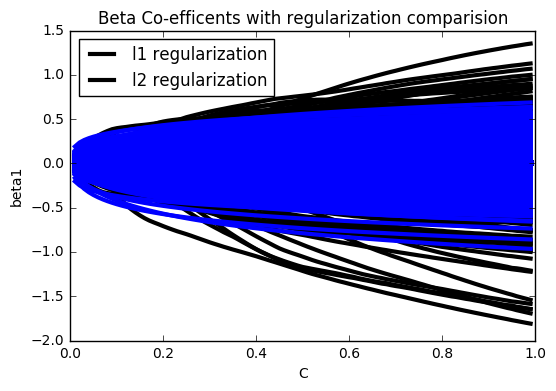

In [18]:
from sklearn.linear_model import LogisticRegression

Y = binary['class_Pos']
beta1_l1 = []
beta1_l2 = []
Cs = []
scores_l1 = []
scores_l2 = []

for i in range(1, 100):
    C = i/100.0
    #Fit l1  regularization 
    logitm_l1 = sk.LogisticRegression(C = C, penalty = "l1")
    logitm_l1.fit (X_train, y_train)
    
    #Fit l2  regularization     
    logitm_l2 = sk.LogisticRegression(C = C, penalty = "l2")
    logitm_l2.fit (X_train, y_train)
    
    #save betas of each C
    beta1_l1.append(logitm_l1.coef_[0])
    beta1_l2.append(logitm_l2.coef_[0])
    
    #save scores of each C
    scores_l1.append(logitm_l1.score(X_test, y_test))
    scores_l2.append(logitm_l2.score(X_test, y_test))

    #save current C
    Cs.append(C)

#plot ridge regression vs lasso
plt.plot(Cs, beta1_l1,  color='black', lw=3)
plt.plot(Cs, beta1_l2,  color='blue', lw=3)
plt.xlabel ("C")
plt.ylabel("beta1")
plt.title("Beta Co-efficents with regularization comparision")
plt.legend( ['l1 regularization', 'l2 regularization'],loc= 'best')
plt.show()

The co-efficients are shrunk by both ridge and lasso regression (l1 and l2 regularization), however in this scenario, the l2(Lasso) performs better as it has taken the co-efficients closer to 0.

Below we can see that our model successfully classifies approximately 85% of the reviews correctly. It is also noticable that lasso's regularization of the co-efficients also gaines approximately 5% more correctly classified results on the test set. 

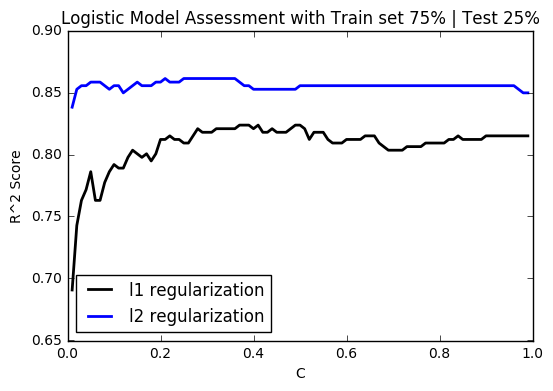

In [17]:
#Split training testing 0.75
plt.plot(Cs, scores_l1,  color='black', lw=2)
plt.plot(Cs, scores_l2,  color='blue', lw=2)
plt.xlabel ("C")
plt.ylabel("R^2 Score")
plt.title("Logistic Model Assessment with Train set 75% | Test 25%")
plt.legend( ['l1 regularization', 'l2 regularization'],loc= 'best')
plt.show()

Report

   a. Data collection & cleaning
   
   The data was processed from strings 'Neg' and 'Pos' to binary (0,1) values. This was done as the program cant interpret strings. From there the text was processed to remove all words that are commonly used in the english language, and all words were transformed to lowercase. After this was completed, words were translated to vectors or number representations.
   
   b. Data exploration
   
   We had 9772 different words in all the texts. Some of the most common words in the reviews included:
       Ford, Drive, Very, Like, Seat
   
   c. Modeling
   
   The model used was logistic regression. This is a model which learns from a training dataset, and models on the vector of number we did above with the corresponding values, either 0 for negative review or 1 for positive review.
   
   Once the model is trained we can test the models performance by giving it text, and comparing its result to the actual result (truth value). Two statiscal methods were used to shrink the co-efficents of the model.
   
   d. Analysis  
   
   Our model performed well with lasso logistic regression model. The performance was 85% and that means that it classified our text sentiments correctly 85% of the time. Ridge regressions performance followed closely behind at 80%.
   
   e. Visualization and presentation  
   
   

## Challenge Problem: Automated Medical Diagnosis

In this problem, you are going to build a model to diagnose heart disease. 

The training set is provided in the file ``dataset_3_train.txt`` and there are two test sets: ``dataset_3_test_1.txt`` and ``dataset_3_test_2.txt``. Each patient in the datasets is described by 5 biomarkers extracted from cardiac SPECT images; the last column in each dataset contains the disease diagnosis (1 indicates that the patient is normal, and 0 indicates that the patient suffers from heart disease).

- Fit a logistic regression model to the training set, and report its accuracy on both the test sets. 


- Is your accuracy rate meaningful or reliable? How comfortable would you be in using your predictions to diagnose real living patients? Justify your answers. 

  (**Hint:** How does the performance of your model compare with a classifier that lumps all patients into the same class?)


- Let's call the logistic regression model you learned, ${C}_1$. Your colleague suggests that you can get higher accuracies for this task by using a threshold of 0.05 on the Logistic regression model to predict labels instead of the usual threshold of 0.5, i.e. use a classifier that predicts 1 when $\widehat{P}(Y = 1\,|\, X) \geq 0.05$ and 0 otherwise. Let's call this classifier ${C}_2$. Does ${C}_2$ perform better the two test sets - that is, which one would you rather use for automated diagnostics? Support your conclusion with careful analysis. 


- Generalize your analysis of these two classifiers. Under what general conditions does $C_2$ perform better than ${C}_1$? Support your conclusion with a mathematical proof or simulation


**Hint:** You were told in class that a classifier that predicts 1 when $\widehat{P}(Y = 1 \,|\, X) \geq 0.5$, and 0 otherwise, is the Bayes classifier. This classifier minimizes the classification error rate. What can you say about a classifier that uses a threshold other than $0.5$? Is it the Bayes classifier for a different loss function?


**Hint:** For the first three parts, you might find it useful to analyze the conditional accuracy on each class.